# D3.2 Problems
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem D3.1</h2>
    </header>

A 2.25 kg box is moving across a horizontal floor. There is a coefficient of kinetic friction between the box and the floor of 0.400. A time-dependent applied pushing force of $f_x = 11 + 3.00t^2 - 0.500t^3$ is applied over the time interval of $t = [0.00,3.00]$ s. Assume the box is initially at rest and starting at $x = 0.00$ m.

1. What are the impulses delivered by each forces acting on the box during the first 3 seconds?
2. What is the net acceleration of the box during the first three seconds?
3. What is the velocity of the box at t = 3.00 s?
4. What is the position of the box at t = 3.00 s?
5. After 3 s, the pushing force is no longer applied. How long time from t = 0 s does it take the box to come to a stop?
6. What is its position when it comes to a stop?

In [1]:
%reset -f
import sympy as sym

m = 2.25
mu = 0.400
t1 = 0.0
t2 = 3.0
x1 = 0.0
v1x = 0.0
g = 9.81


# PART 1
#integral variable
t = sym.Symbol('t')

#forces: standard coordinate system

#gravity
fgy = -m*g

#normal
fny = -fgy

#friction 
ffx = -mu*fny

#push force
fpx = 11 + 3*t**2 - 0.500*t**3

#impulse: integral of force with respect to time

ifgy = sym.integrate(fgy,(t,t1,t2))
ifny = sym.integrate(fny,(t,t1,t2))
iffx = sym.integrate(ffx,(t,t1,t2))
ifpx = sym.integrate(fpx,(t,t1,t2))
print('Part 1')
print('Force of gravity impulse: '+ str(ifgy))
print('Normal force impulse: '+ str(ifny))
print('Force of friction impulse: '+ str(iffx))
print('Push force impulse: '+ str(ifpx))
print(' ')

# PART 2: Use f_net = ma --> 0 = ma - f_net

# x-direction
ax = sym.Symbol('ax')
eqx = m*ax - fpx - ffx
solx = sym.solve(eqx,ax)
print('Part 2')
print('a_x = '+str(solx[0]))
print(' ')
ax = solx[0]

# PART 3: integrate acceleration to find change in velocity, then add initial to get final
dvx = sym.integrate(ax,(t,t1,t2))
v2x = v1x + dvx
print('Part 3')
print('v2_x = '+str(v2x))
print(' ')

# PART 4
#integrate acceleration to get velocity (start from rest)
vx = sym.integrate(ax,t)
#integrate velocity to get position  (start at x = 0)
x = sym.integrate(vx,t)
x = x.evalf(subs={t: 3.0})
print('Part 4')
print('x = '+ str(x))
print(' ')

# Part 5: only force is friction and it is constant
# find acceleration and use kinematics equation to find time
a = sym.Symbol('a')
eq1 = m*a - ffx
sol1 = sym.solve(eq1,a)
a = sol1[0]
dt = (0.0 - v2x)/a
t = 3.0 + dt
print('Part 5')
print('Elapsed time: '+str(t))
print(' ')

# Part 6: find the additional distance after t = 3 s. 
# acceleration is constant so we can use derived equation of kinematics
dx = (0.0**2 - v2x**2)/(2*a)
xf = x + dx
print('Part 6')
print('Final position = '+str(xf))

Part 1
Force of gravity impulse: -66.2175000000000
Normal force impulse: 66.2175000000000
Force of friction impulse: -26.4870000000000
Push force impulse: 49.8750000000000
 
Part 2
a_x = -0.222222222222222*t**3 + 1.33333333333333*t**2 + 0.964888888888889
 
Part 3
v2_x = 10.3946666666667
 
Part 4
x = 10.6420000000000
 
Part 5
Elapsed time: 5.64899762147469
 
Part 6
Final position = 24.4097236380111


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem D3.2</h2>
    </header>

A UVU student has been tasked with pulling a 10.0 kg box full of research equipment up a slick rock hill in Capitol Reef National Park. The hill is sloped with an angle of $12.0^\circ$ from the horizontal. There is a coefficient of friction between the rock surface and the box of 0.55. The student is optimistic at first but quickly runs out of stamina as evidenced by the measured pulling force (in N) of $f(t) = 74 - 0.07t$ along the incline of the hill. The student and box starts out from rest.

1. How long time did it take before the net acceleration is zero?
2. What is the speed of the box at that time?
3. How far up the incline hill is the box at that time?
4. The student continues to move up the hill until the student can no longer pull at which the speed zero. At what time does that occur?
5. What distance up the hill did the box make it before the student need to take a break?
6. Create plots of the acceleration, velocity, and distance up the incline.

Time to zero acceleration: 11.8272761883619
Speed: 4.89595617125276
Distance up incline: 38.6038838956809
Time to exhaustion: 23.6545523767239
Distance to breaking point: 77.2077677913618


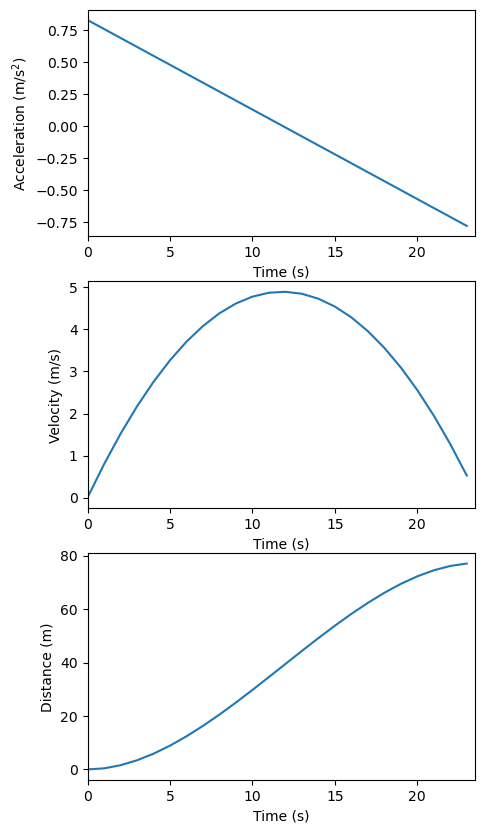

In [2]:
%reset -f
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt 

m = 10.0
mu = 0.55
g = 9.81
theta = 12.0*np.pi/180.0
t1 = 0.0

# PART 1
# Use N2 in x and y. x positive up the incline

ax = 0.0
t = sym.Symbol('t')
fny = sym.Symbol('fny')

fgy = -m*g*np.cos(theta)
fgx = -m*g*np.sin(theta)
ffx = -mu*fny
fpx = 74 - 0.07*t

eqx = ax - fpx - ffx - fgx
eqy = 0 - fny - fgy
sol1 = sym.solve((eqx,eqy),(t,fny))

t2 = sol1[t]
print('Time to zero acceleration: '+str(t2))

# PART 2
del ax

ax = sym.Symbol('ax')
eqx = ax - fpx - ffx - fgx
eqy = 0 - fny - fgy
sol2 = sym.solve((eqx,eqy),(ax,fny))

ax = sol2[ax]
vx = sym.integrate(ax,t)
v = vx.evalf(subs={t: t2})
print('Speed: '+str(v))

# Part 3
x = sym.integrate(vx,t)
d1 = x.evalf(subs={t: t2})
print('Distance up incline: '+str(d1))

# Part 4
eq3 = vx
sol2 = sym.solve(eq3,t)
print('Time to exhaustion: '+str(sol2[1]))

# Part 5
t3 = sol2[1]
d2 = x.evalf(subs={t: t3})
print('Distance to breaking point: '+str(d2))


t_array = np.arange(0,t3,1)
a_array = []
v_array = []
x_array = []
for i in range(len(t_array)):
    a_result = ax.evalf(subs={t: t_array[i]})
    a_array.append(a_result)
    v_result = vx.evalf(subs={t: t_array[i]})
    v_array.append(v_result)
    x_result = x.evalf(subs={t: t_array[i]})
    x_array.append(x_result)

fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(5,10))

ax1.set(ylabel='Acceleration (m/s$^2$)', xlabel='Time (s)')
ax1.plot(t_array,a_array,'-')
ax1.set_xlim([0, np.max(t_array)+0.5])

ax2.set(ylabel='Velocity (m/s)', xlabel='Time (s)')
ax2.plot(t_array,v_array,'-')
ax2.set_xlim([0, np.max(t_array)+0.5])

ax3.set(ylabel='Distance (m)', xlabel='Time (s)')
ax3.plot(t_array,x_array,'-')
ax3.set_xlim([0, np.max(t_array)+0.5])

plt.show()

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem D3.3</h2>
    </header>

A 1.0 kg particle is initially at rest at (x,y) = (0.00, 0.00) m. At t = 0.00 s a net force is applied. The force is given by $\vec{f} = [(2.00 + 1.50y)\hat{i} + (0.500t)\hat{j}]~\textrm{N}$. What is the x-position of the particle at t = 8.00 s?

In [3]:
%reset -f 

import sympy as sym

m = 1.0
x1 = 0.0
y1 = 0.0
t1 = 0.0
t2 = 8.00

t = sym.Symbol('t')
x = sym.Symbol('x')
y = sym.Symbol('y')

fy = 0.550*t
y = sym.integrate(fy,t)

fx = 2.00 + 1.50*y
x = sym.integrate(fx,t)
x2 = x.subs(t,t2)
print('The position is '+str(x2)+' m.')

The position is 86.4000000000000 m.


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem D3.4</h2>
    </header>

Mass $M_A = 4.0$ kg rests on top of mass $M_B = 5.0$ kg that rests on a frictionless table. The coefficient of friction between the two blocks is such that the blocks just start to slip when the horizontal force $F$ applied to the lower block is $27$ N. Suppose that now a horizontal force is applied to the upper block. What is its maximum value for the blocks to slide without slipping relative to each other?

<img src="P-fig3.4.png"  width="200"/>

**This is problem 3.2 in Kleppner and Kolenkow**.

In [4]:
%reset -f

import sympy as sym

M_A = 4.0
M_B = 5.0
g = 9.81
F = 27

#First find coefficient of friction before a force is applied to A
#Choose standard cartesian reference frame
Fg_A = M_A*g
Fg_B = M_B*g

mu = sym.Symbol('mu')   #coeff of friction
FN_AB = sym.Symbol('FN_AB')  #normal force on A due to B
FN_B = sym.Symbol('FN_B')    #normal force on B due to table
A_Ax = sym.Symbol('A_Ax')    #x-acc of A
A_Ay = sym.Symbol('A_Ay')
A_Bx = sym.Symbol('A_Bx')
A_By = sym.Symbol('A_By')

Ff = mu*FN_AB    #frictional force
FN_BA = FN_AB  #normal force on B due to A

#N2 on A:
eqAx = M_A*A_Ax - Ff
eqAy = M_A*A_Ay - FN_AB + Fg_A

#N2 on B
eqBx = M_B*A_Bx - F + Ff
eqBy = M_B*A_By + FN_BA + Fg_B - FN_B

#equation of constraint: x1 = x2 --> A_AX = A_Bx
eq1 = A_Ax - A_Bx
#equation of constraint: y1 = constant, y2 = constant --> A_Ay = A_By = 0
eq2 = A_Ay
eq3 = A_By

sol = sym.solve((eqAx,eqAy,eqBx,eqBy,eq1,eq2,eq3),(mu, FN_AB,FN_B,A_Ax,A_Ay,A_Bx,A_By))
mu = sol[0][0]

#-------------------
# Assume the force on block B is gone and a new horizontal, unknown force F_A is applied to A
#-------------------
F_A = sym.Symbol('F_A')
Ff = mu*FN_AB    #frictional force but now mu is known

#N2 on A:
eqAx = M_A*A_Ax + Ff - F_A
eqAy = M_A*A_Ay - FN_AB + Fg_A

#N2 on B
eqBx = M_B*A_Bx - Ff
eqBy = M_B*A_By + FN_BA + Fg_B - FN_B

#same equations of constraint
sol1 = sym.solve((eqAx,eqAy,eqBx,eqBy,eq1,eq2,eq3),(F_A, FN_AB,FN_B,A_Ax,A_Ay,A_Bx,A_By))
print('The maximum force is '+str(sol1[F_A])+' N')

The maximum force is 21.6000000000000 N


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem D3.5</h2>
    </header>

The system of masses $M_1$, $M_2$, and $M_3$ in the sketch uses massless pulleys and ropes. The horizontal table is frictionless. Gravity is directed downward.

1. Draw force diagrams, and show all relevant coordinates.
2. How are the accelerations related?

<img src="P-fig3.5.png"  width="200"/>

**This is part of problem 2.10 in Kleppner and Kolenkow**.

```{admonition} Problem D2.1
:class: tip, dropdown

<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">
<header>

#### Part 1

My choice of coordinate system and respective non-zero coordinates are shown.  

<img src="P-fig3.5a.png"  width="400"/>

The free-body-diagram is shown below

<img src="P-fig3.5b.png"  width="400"/>

The red spots are all the interaction points. In this example, we took advantage of the fact that the pulleys and ropes are massless, which means that are just transmitting the forces and play no other role in the dynamics.

#### Part 2

The length of the rope, $l$ is constant. With the coordinates chosen, we then have the following equation of constraint

$$ x_2 - x_1 + 2y_3 = l $$

Take twice the time derivative provides us with the relationship between the accelerations

$$ \ddot{x}_2 - \ddot{x}_1 + 2\ddot{y}_2 = 0 $$ 
</div>
```

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem D3.6</h2>
    </header>

A $45^\circ$ wedge is pushed along a table with constant acceleration $A$. A block of mass $m$ slides without friction on the wedge. Find the block’s acceleration.

<img src="P-fig3.6.png"  width="200"/>

**This is problem 2.11 in Kleppner and Kolenkow**.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem D3.7</h2>
    </header>

A pole of negligible mass leans against a wall, at angle θ with the horizontal. Find the constraint relating the vertical acceleration of one end to the horizontal acceleration of the other.


<img src="P-fig3.7a.png"  width="200"/>

**This is part of problem 2.7 in Kleppner and Kolenkow**.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">